In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from Bio import SeqIO
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_dir = "" 
save_dir = ""
models = ["vgg16", "resnet50", "xception", "efficientnetv2s"]

# Accuracy

In [19]:
def extract_number(label):
    return int(label.split("_")[-1])

def accuracy(predicted_matrix):
    # make true labels
    true_labels = predicted_matrix.index.map(extract_number)

    # Determine predicted labels by selecting the column with the highest probability
    predictions = predicted_matrix.idxmax(axis=1).astype(int)

    # Compute accuracy, recall and precision
    accuracy = accuracy_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions, average="macro")
    precision = precision_score(true_labels, predictions, average="macro")
    return accuracy, recall, precision


## CIFAR-10

In [3]:
accuracy_data = pd.DataFrame(index=models,columns=["cnn_model", "primo", "proposed (only triplet)", "proposed"])
models = ["vgg16", "resnet50", "xception", "efficientnetv2s"]
dataset = "cifar10"
for model in models:
    hp_loss_data = []
    for file in sorted(os.listdir(f"{data_dir}/{dataset}/simulation/{model}/")):
        if file == "cifar10-predict.h5":
            data = pd.read_hdf(f"{data_dir}/{dataset}/simulation/{model}/{file}")
            acc, _, _ = accuracy(data)
            accuracy_data.loc[model, "cnn_model"] = acc
        elif file.startswith("triplet_only"):
            data = pd.read_hdf(f"{data_dir}/{dataset}/simulation/{model}/{file}")
            acc, _, _ = accuracy(data)
            accuracy_data.loc[model, "proposed (only triplet)"] = acc
        elif file.startswith("primo"):
            data = pd.read_hdf(f"{data_dir}/{dataset}/simulation/{model}/{file}")
            acc, _, _ = accuracy(data)
            accuracy_data.loc[model, "primo"] = acc
        else:
            data=pd.read_hdf(f"{data_dir}/{dataset}/simulation/{model}/{file}")
            acc, _, _ = accuracy(data)
            hp_loss_data.append(acc)
        accuracy_data.loc[model, "primo"] = acc
    accuracy_data.loc[model, "proposed"] = f"{np.mean(hp_loss_data):.3f}+-{np.std(hp_loss_data):.3f}"

print(accuracy_data)

                cnn_model   primo proposed (only triplet)      proposed
vgg16               0.854   0.862                   0.862  0.864+-0.001
resnet50           0.9274  0.9324                  0.9324  0.932+-0.001
xception           0.7834  0.7939                  0.7939  0.793+-0.001
efficientnetv2s    0.9474  0.9485                  0.9485  0.948+-0.001


## CIFAR-100

In [20]:
accuracy_data = pd.DataFrame(index=models,columns=["cnn_model", "primo", "proposed (only triplet)", "proposed"])
models = ["vgg16", "resnet50", "xception", "efficientnetv2s"]
dataset = "cifar100"
for model in models:
    hp_loss_data = []
    for file in sorted(os.listdir(f"{data_dir}/{dataset}/simulation/{model}/")):
        if file == "cifar100-predict.h5":
            data = pd.read_hdf(f"{data_dir}/{dataset}/simulation/{model}/{file}")
            acc, _, _ = accuracy(data)
            accuracy_data.loc[model, "cnn_model"] = acc
        elif file.startswith("triplet_only"):
            data = pd.read_hdf(f"{data_dir}/{dataset}/simulation/{model}/{file}")
            acc, _, _ = accuracy(data)
            accuracy_data.loc[model, "proposed (only triplet)"] = acc
        elif file.startswith("primo"):
            data = pd.read_hdf(f"{data_dir}/{dataset}/simulation/{model}/{file}")
            acc, _, _ = accuracy(data)
            accuracy_data.loc[model, "primo"] = acc
        else:
            data=pd.read_hdf(f"{data_dir}/{dataset}/simulation/{model}/{file}")
            acc, _, _ = accuracy(data)
            hp_loss_data.append(acc)
        accuracy_data.loc[model, "primo"] = acc
    accuracy_data.loc[model, "proposed"] = f"{np.mean(hp_loss_data):.3f}+-{np.std(hp_loss_data):.3f}"

print(accuracy_data)

                cnn_model   primo proposed (only triplet)      proposed
vgg16              0.6305  0.6722                  0.6722  0.659+-0.005
resnet50           0.7115  0.7281                  0.7281  0.724+-0.002
xception           0.7489  0.7542                  0.7542  0.754+-0.001
efficientnetv2s     0.814  0.8129                  0.8129  0.802+-0.004


# Trajectory of Training

In [4]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

cifar10
vgg16
1.4843205574912892
resnet50
2.086206896551724
xception
1.9350649350649352
efficientnetv2s
1.7659574468085106
cifar100
vgg16
1.9940119760479043
resnet50
2.711864406779661
xception
1.5294117647058822
efficientnetv2s
0.985


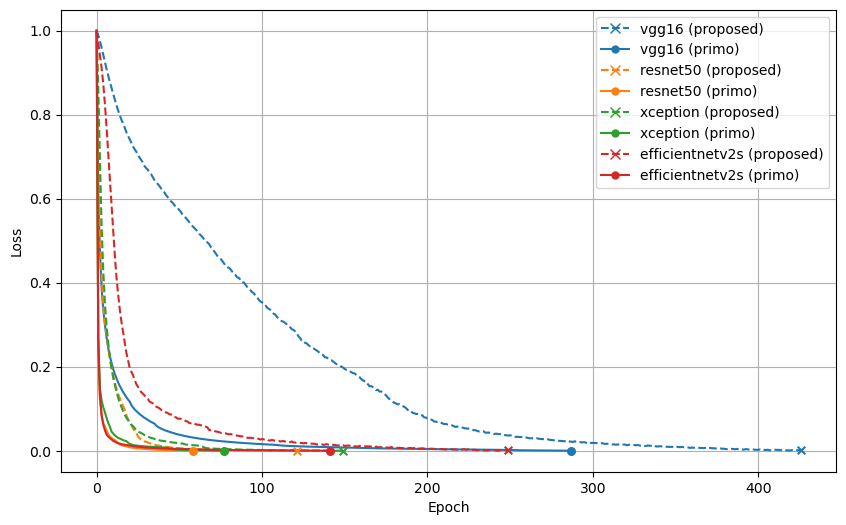

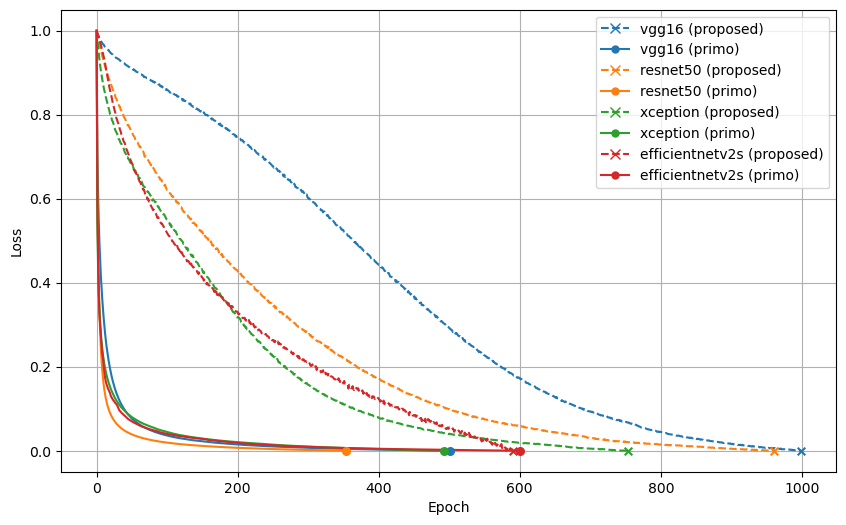

In [6]:
for class_num in [10, 100]:
    dataset = f"cifar{class_num}"
    print(dataset)
    dir=os.path.join(data_dir,f"cifar{class_num}","models")
    colors = ["tab:blue", "tab:orange", "tab:green", "tab:red"]
    plt.figure(figsize=(10, 6))
    for model in models:
        print(model)
        c =colors.pop(0)
        primo = 0
        triplet = 0
        for i in os.listdir(os.path.join(dir, model)):
            if "primo" in i and i.endswith(".csv"):
                data = pd.read_csv(os.path.join(dir, model, i))
                norm = data["loss"].max() - data["loss"].min()
                dot = (data["loss"] - data["loss"].min()) / norm
                plt.plot(data.index, dot, label=model+" (primo)", color=c)
                plt.scatter(data.index[-1], dot.iloc[-1], color=c, marker='o', s=30, zorder=5)
                primo = data.index.max()
            elif "triplet" in i and i.endswith(".csv"):
                data = pd.read_csv(os.path.join(dir, model, i))
                norm = data["triplet_metrics"].max() - data["triplet_metrics"].min()
                dot = (data["triplet_metrics"] - data["triplet_metrics"].min()) / norm
                plt.plot(data.index, dot, label=model+" (proposed)", linestyle="--", color=c)
                plt.scatter(data.index[-1], dot.iloc[-1], color=c, marker='x', s=30, zorder=5)
                triplet = data.index.max()
            elif primo*triplet > 0:
                break
            else:
                continue
        print(triplet/primo)

    handles, labels = plt.gca().get_legend_handles_labels()
    custom_handles = []
    custom_labels = []
    for h, l in zip(handles, labels):
        if "(primo)" in l:
            custom_handles.append(Line2D([0], [0], color=h.get_color(), linestyle='-', marker='o', markersize=5))
        elif "(proposed)" in l:
            custom_handles.append(Line2D([0], [0], color=h.get_color(), linestyle='--', marker='x', markersize=7))
        else:
            custom_handles.append(h)
        custom_labels.append(l)
    plt.legend(custom_handles, custom_labels)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid()
    plt.savefig(f"{save_dir}/{model}-{dataset}-history.svg")

# CBIR Results

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [10]:
def compute_nn_recall(predicted_matrix, num_samples, num_classes):
    indices = np.zeros((num_classes, num_samples))

    for class_idx in range(num_classes):
        predicted_matrix.columns = predicted_matrix.columns.astype(int)
        sorted_indices = predicted_matrix.sort_values(class_idx, ascending=False).index
        correct_positions = np.where(sorted_indices.str.endswith(f"_{class_idx}"))[0][:num_samples] + 1
        indices[class_idx, :len(correct_positions)] = correct_positions

    return indices.mean(axis=0)      

## Retrieval Ranking (Similarity Search)

### CIFAR-10

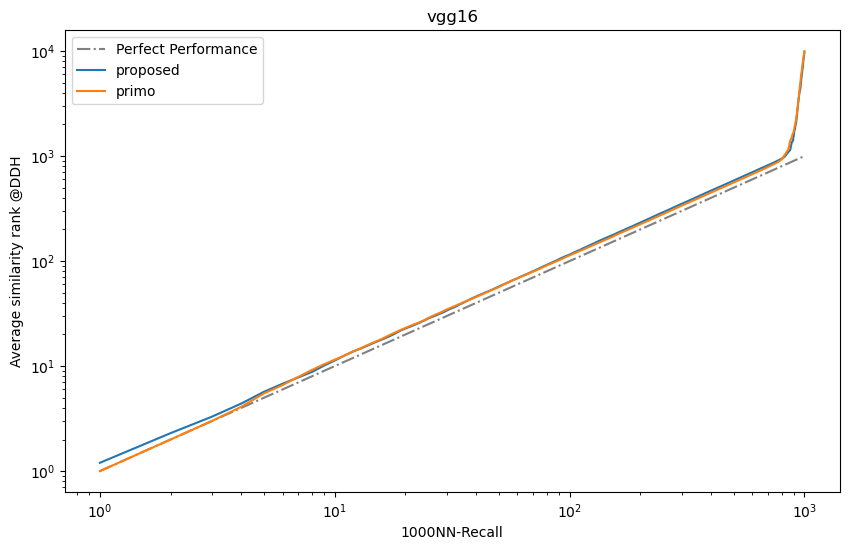

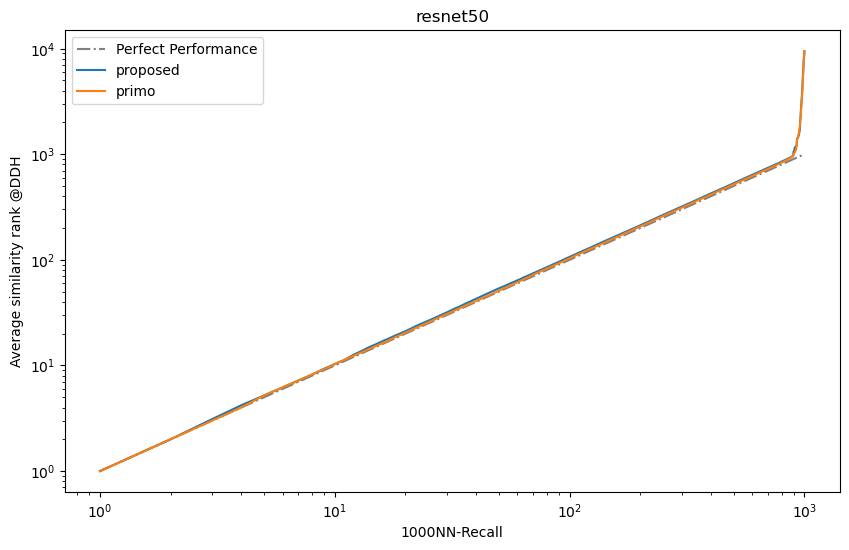

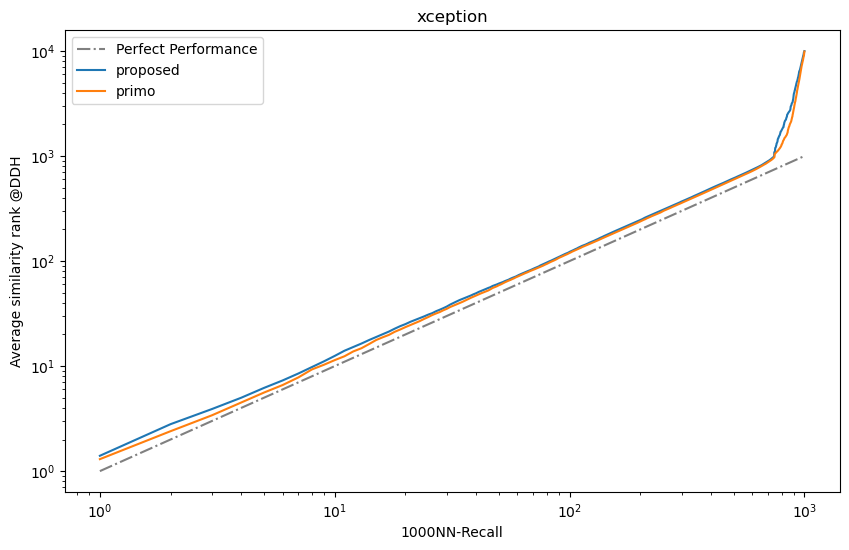

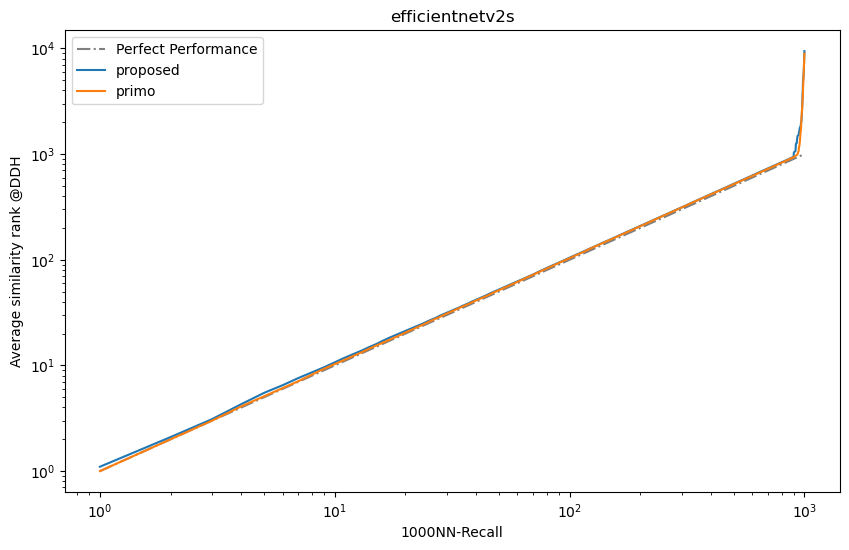

In [11]:
dataset = "cifar10"
num_classes = 10
num_data = 1000
y_true = list(range(1, num_data+1))
for model in models:
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(y_true, y_true, label="Perfect Performance", color="gray", linestyle="-.")
    data = pd.read_hdf(f"{data_dir}/cifar10/simulation/{model}/triplet_only_results.h5")
    triplet_nn_recall = compute_nn_recall(data, num_data, num_classes)
    ax.plot(range(1, num_data+1), triplet_nn_recall, label=f"proposed")
    data = pd.read_hdf(f"{data_dir}/cifar10/simulation/{model}/primo_results.h5")
    primo_nn_recall = compute_nn_recall(data, num_data, num_classes)
    ax.plot(range(1, num_data+1), primo_nn_recall, label=f"primo")
    ax.set_title(f"{model}")
    ax.set_xlabel("1000NN-Recall")
    ax.set_xscale("log")
    ax.set_ylabel("Average similarity rank @DDH")
    ax.set_yscale("log")
    ax.legend()
    fig.savefig(f"{save_dir}/{model}-{dataset}-ranking.svg")

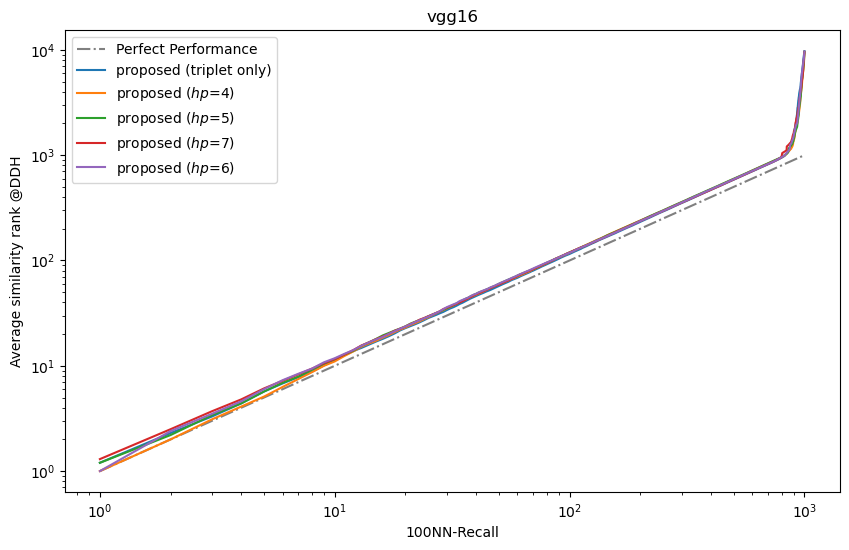

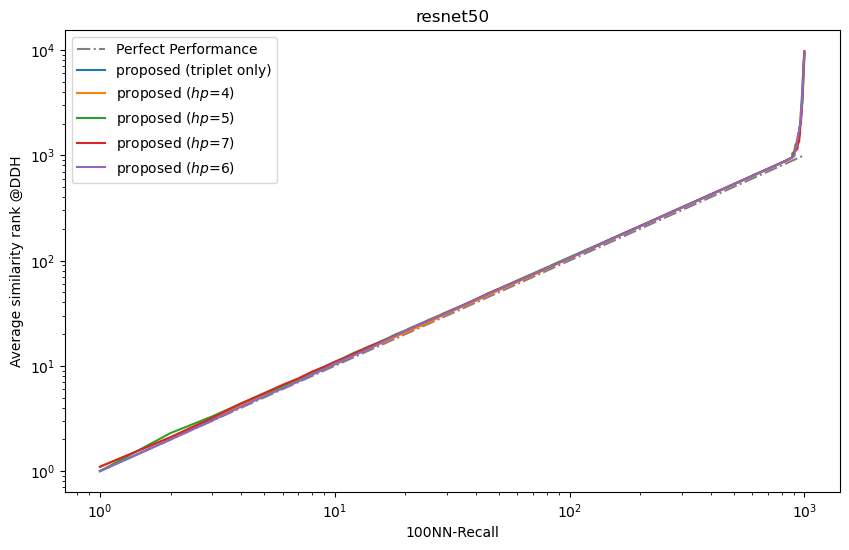

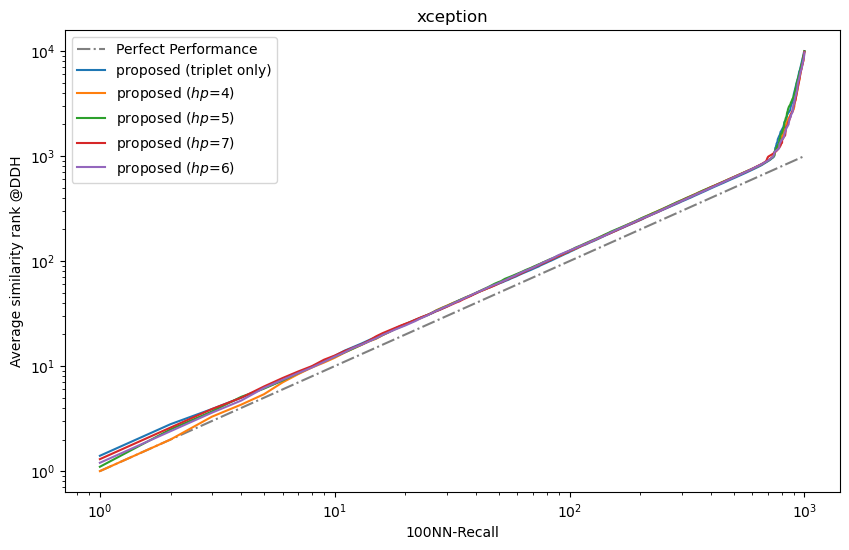

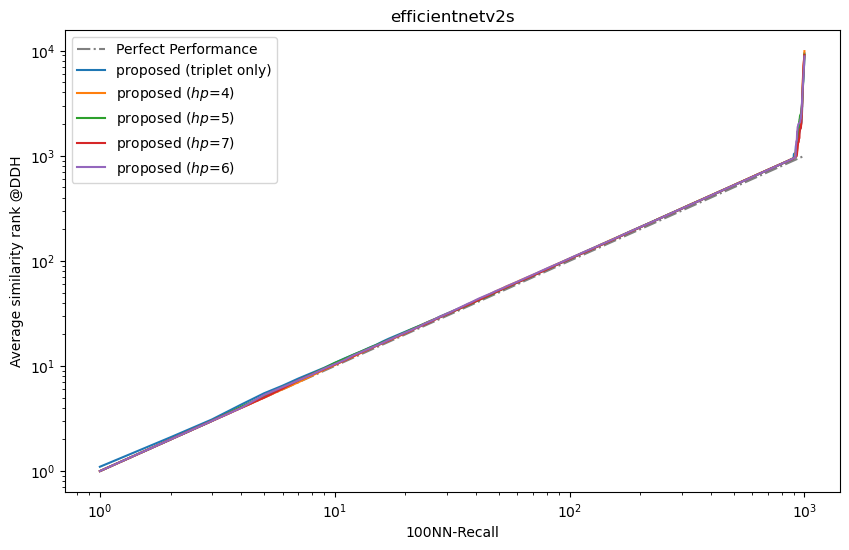

In [12]:
# homopolymer loss version
dataset = "cifar10"
num_classes = 10
num_data = 1000

for model in models:
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(range(1, num_data+1), range(1, num_data+1), label="Perfect Performance", color="gray", linestyle="-.")
    data = pd.read_hdf(f"{data_dir}/{dataset}/simulation/{model}/triplet_only_results.h5")
    nn_recall = compute_nn_recall(data, num_data, num_classes)
    ax.plot(range(1, num_data+1), nn_recall, label=f"proposed (triplet only)")
    for file in os.listdir(f"{data_dir}/{dataset}/simulation/{model}"):
        hp_match = re.search(r"hp(\d+)", file)
        hp = hp_match.group(0) if hp_match else ""
        if hp == "":
            continue
        else:
            data = pd.read_hdf(f"{data_dir}/{dataset}/simulation/{model}/{file}")
            nn_recall = compute_nn_recall(data, num_data, num_classes)
            hp_match = re.search(r"hp(\d+)", file)
            hp = hp_match.group(0) if hp_match else ""
            ax.plot(range(1, num_data+1), nn_recall, label=fr"proposed ($hp$={hp.replace('hp', '')})")
    ax.set_title(f"{model}")
    ax.set_xlabel("100NN-Recall")
    ax.set_xscale("log")
    ax.set_ylabel("Average similarity rank @DDH")
    ax.set_yscale("log")
    ax.legend()
    fig.savefig(f"{save_dir}/{model}-{dataset}-hp-ranking.svg")

### CIFAR-100

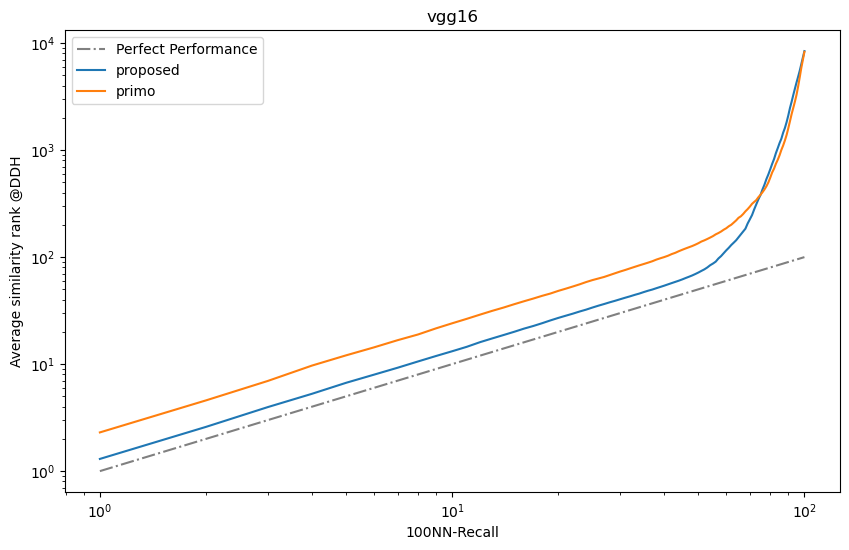

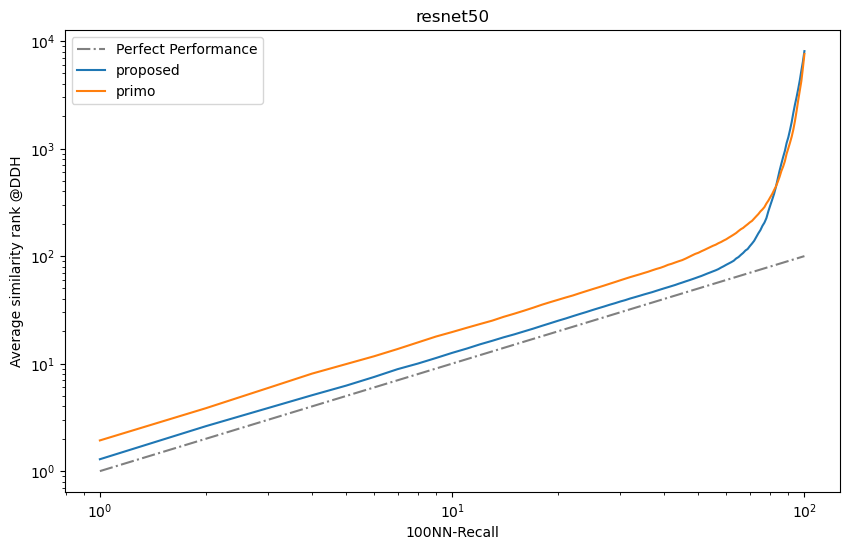

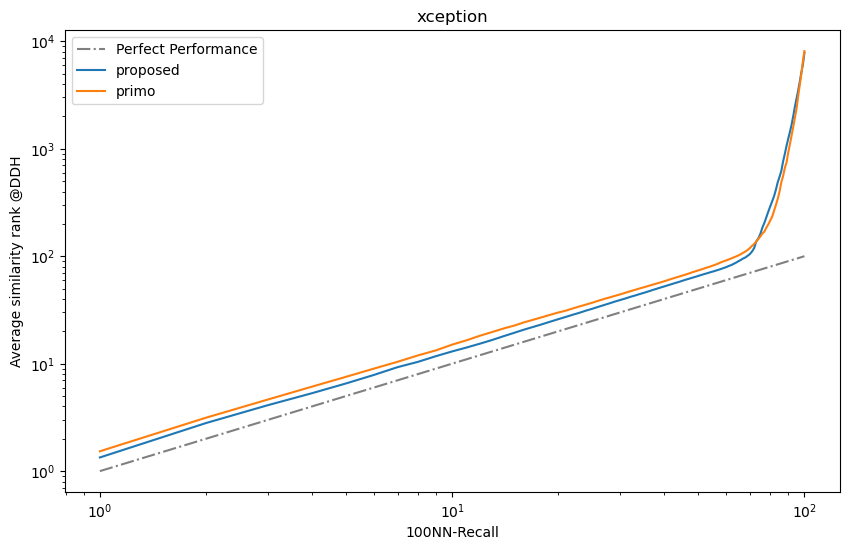

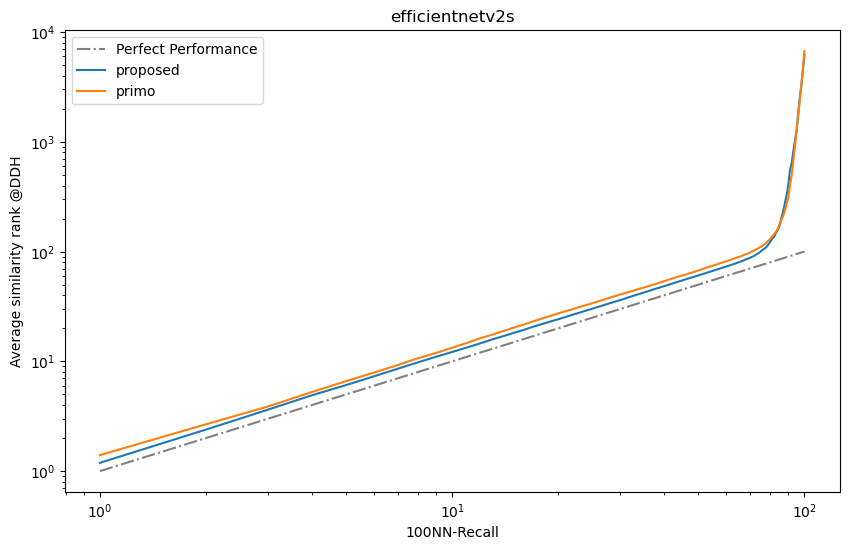

In [13]:
dataset = "cifar100"
num_classes = 100
num_data = 100

for model in models:
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(range(1, num_data+1), range(1, num_data+1), label="Perfect Performance", color="gray", linestyle="-.")
    data = pd.read_hdf(f"{data_dir}/{dataset}/simulation/{model}/triplet_only_results.h5")
    triplet_nn_recall = compute_nn_recall(data, num_data, num_classes)
    ax.plot(range(1, num_data+1), triplet_nn_recall, label=f"proposed")
    data = pd.read_hdf(f"{data_dir}/{dataset}/simulation/{model}/primo_results.h5")
    primo_nn_recall = compute_nn_recall(data, num_data, num_classes)
    ax.plot(range(1, num_data+1), primo_nn_recall, label=f"primo", linestyle="-")
    ax.set_title(f"{model}")
    ax.set_xlabel("100NN-Recall")
    ax.set_xscale("log")
    ax.set_ylabel("Average similarity rank @DDH")
    ax.set_yscale("log")
    ax.legend()
    fig.savefig(f"{save_dir}/{model}-{dataset}-ranking.svg")

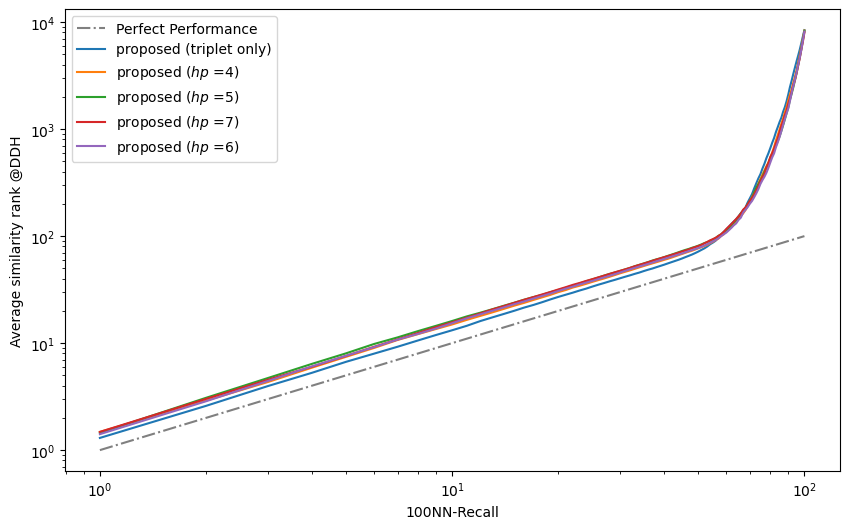

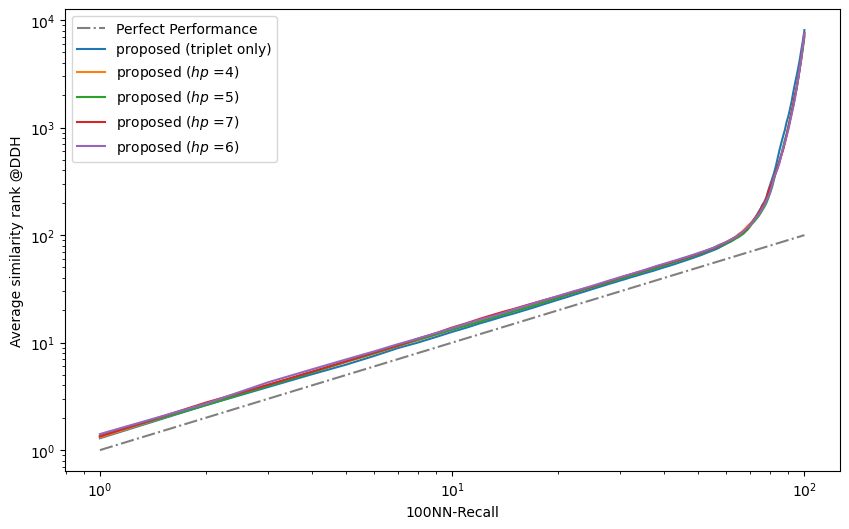

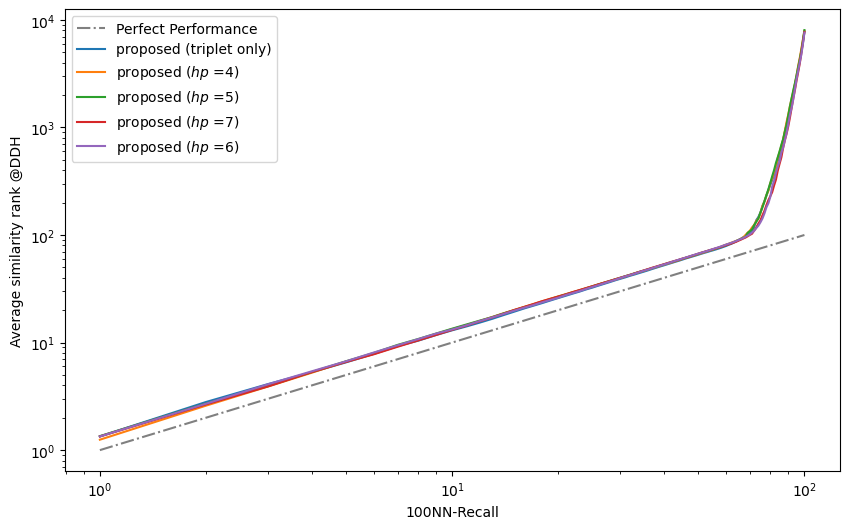

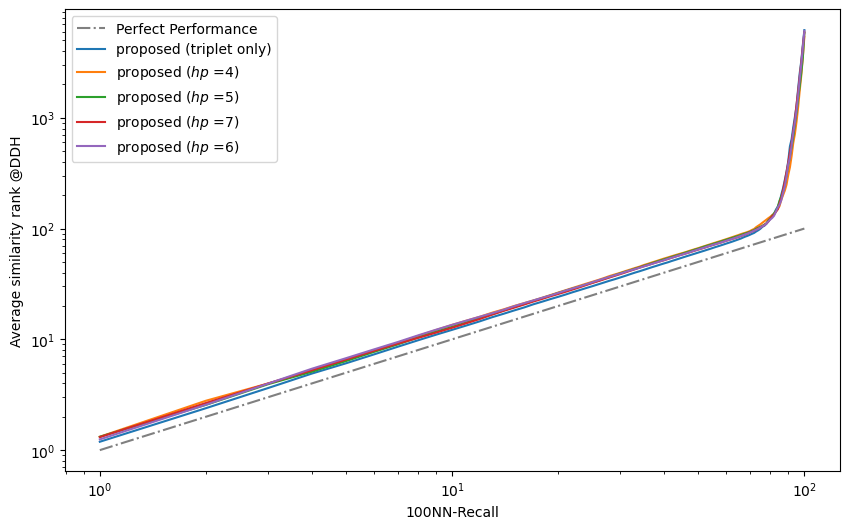

In [14]:
# homopolymer loss version
dataset = "cifar100"
num_classes = 100
num_data = 100

for model in models:
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(range(1, num_data+1), range(1, num_data+1), label="Perfect Performance", color="gray", linestyle="-.")
    data = pd.read_hdf(f"{data_dir}/{dataset}/simulation/{model}/triplet_only_results.h5")
    nn_recall = compute_nn_recall(data, num_data, num_classes)
    ax.plot(range(1, num_data+1), nn_recall, label=f"proposed (triplet only)")
    for file in os.listdir(f"{data_dir}/{dataset}/simulation/{model}/"):
        hp_match = re.search(r"hp(\d+)", file)
        hp = hp_match.group(0) if hp_match else ""
        if hp == "":
            continue
        else:
            data = pd.read_hdf(f"{data_dir}/{dataset}/simulation/{model}/{file}")
            nn_recall = compute_nn_recall(data, num_data, num_classes)
            ax.plot(range(1, num_data+1), nn_recall, label=fr"proposed ($hp$ ={hp.replace('hp', '')})")
    ax.set_xlabel("100NN-Recall")
    ax.set_xscale("log")
    ax.set_ylabel("Average similarity rank @DDH")
    ax.set_yscale("log")
    ax.legend()
    fig.savefig(f"{save_dir}/{model}-{dataset}-hp-ranking.svg")

# Visualization of DNA encoding space based on hybridization yields using t-SNE (CIFAR-10)

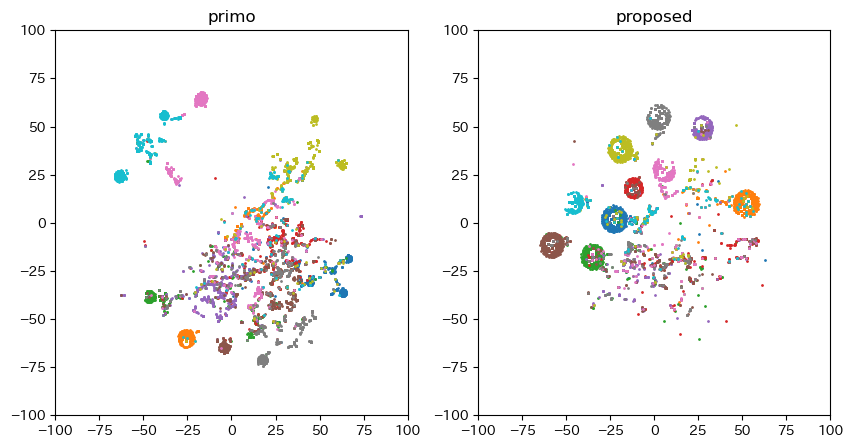

In [13]:
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
primo = pd.read_hdf(f"{data_dir}/cifar10/simulation/vgg16/primo_results.h5")
proposed = pd.read_hdf(f"{data_dir}/cifar10/simulation/vgg16/triplet_only_results.h5")

tsne = TSNE(n_components=2)
# primo_tsne = tsne.fit_transform(primo.values)
# proposed_tsne = tsne.fit_transform(proposed.values)
total_tsne = tsne.fit_transform(np.concatenate([primo.values, proposed.values], axis=0))
primo_tsne = total_tsne[:len(primo)]
proposed_tsne = total_tsne[len(primo):]
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for i in range(10):
    indices = np.where(primo.index.str.endswith(f"_{i}"))[0]
    ax[0].scatter(primo_tsne[indices, 0], primo_tsne[indices, 1], s=1)
    ax[1].scatter(proposed_tsne[indices, 0], proposed_tsne[indices, 1], s=1)
ax[0].set_xlim([-100,100])
ax[0].set_ylim([-100,100])
ax[1].set_xlim([-100,100])
ax[1].set_ylim([-100,100])
ax[0].set_title("primo", fontname="DejaVu Sans")
ax[1].set_title("proposed", fontname="DejaVu Sans")
plt.savefig(f"{save_dir}/vgg16-cifar10-tsne.svg")

# Homopolymer Distribution

In [6]:
from Bio import SeqIO
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import os


In [7]:
# Minimum homopolymer length to detect
def count_homopolymer_from_fasta(min_homopolymer_length, input_fasta, m="fasta"):
    # Initialize dictionary for counting homopolymer lengths
    homopolymer_counts = {}

    # Define regex patterns for homopolymers of A, T, C, and G
    patterns = {base: re.compile(f"{base}{{{min_homopolymer_length},}}") for base in "ATCG"}

    # Read and process each sequence in the FASTA file

    for record in SeqIO.parse(input_fasta, m):
        seq = str(record.seq)

        # Search for homopolymers
        for base, pattern in patterns.items():
            for match in pattern.finditer(seq):
                homopolymer_length = len(match.group())
                if homopolymer_length not in homopolymer_counts:
                    homopolymer_counts[homopolymer_length] = 0
                homopolymer_counts[homopolymer_length] += 1
    
    return homopolymer_counts

## CIFAR-10

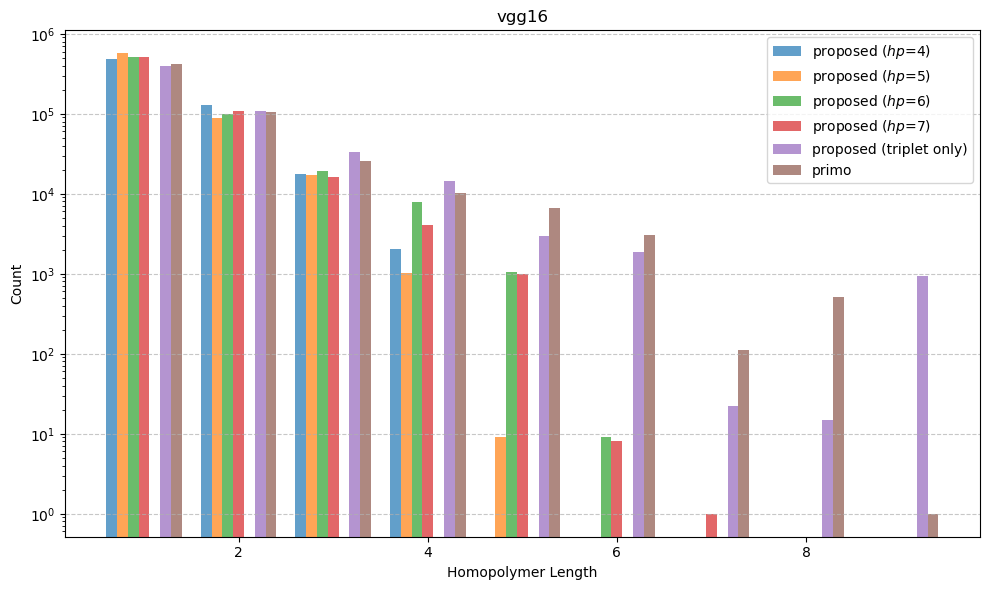

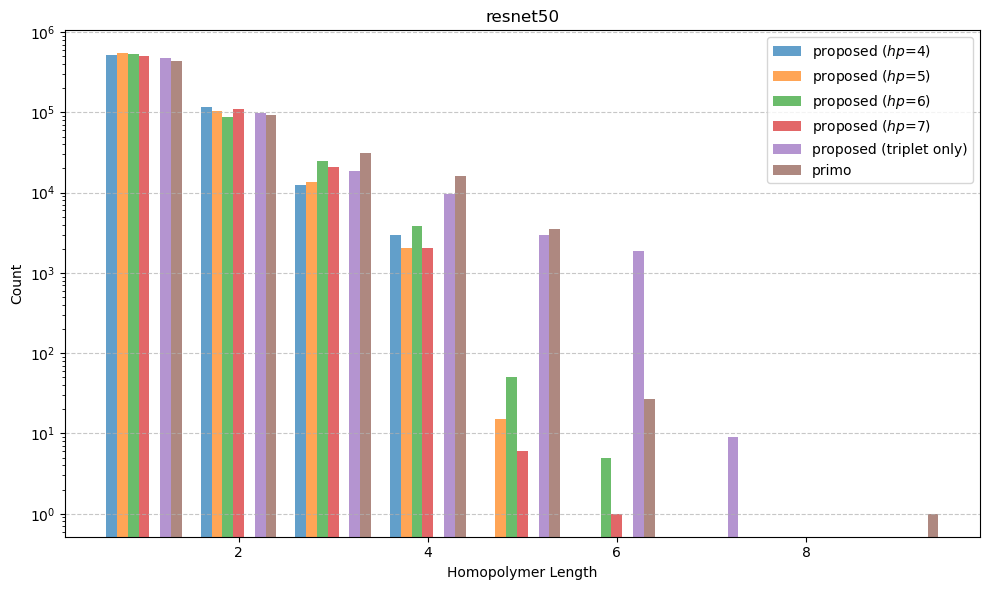

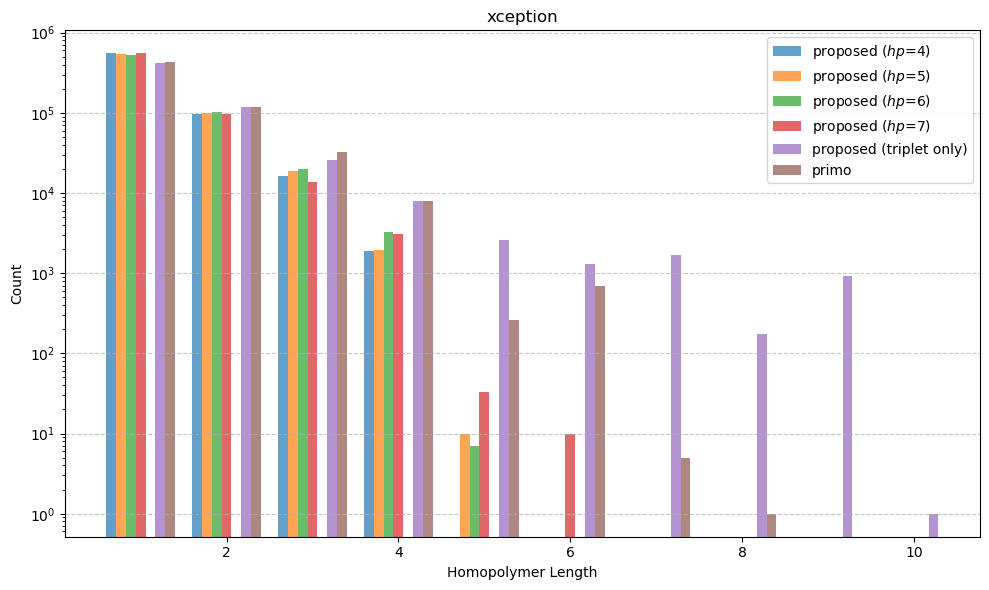

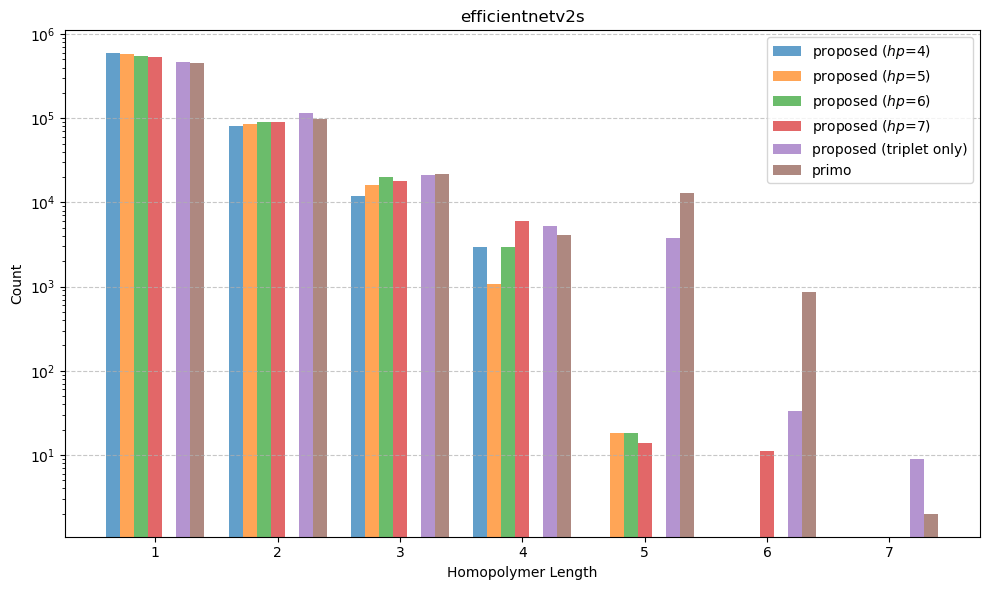

In [8]:
import re
min_homopolymer_length = 1  # Minimum homopolymer length to detect
dataset = "cifar10"
data = f"{data_dir}/{dataset}/sequences/"
for dir in ["vgg16", "resnet50", "xception", "efficientnetv2s"]:
    fig, ax = plt.subplots(figsize=(10, 6))
    files = []
    for file in os.listdir(f"{data}/{dir}/"):
        if not (file.startswith("target") and file.endswith(".fasta")) :
            continue
        file_path = f"{data}/{dir}/{file}"
        files.append(file)

    num_files = len(files) + 2
    bar_width = 0.8 / num_files
    offsets = np.linspace(-0.4 + bar_width / 2, 0.4 - bar_width / 2, num_files)
    for idx, file in enumerate(sorted(files)):
        hp_match = re.search(r"hp(\d+)", file)
        hp = hp_match.group(0) if hp_match else ""
        if hp == "":
            continue
        fasta_file = f"{data}/{dir}/{file}"
        homopolymer_counts = count_homopolymer_from_fasta(min_homopolymer_length, fasta_file)
        df = pd.DataFrame(sorted(homopolymer_counts.items()), columns=["Length", "Count"])
        ax.bar(
            df["Length"] + offsets[idx],
            df["Count"],
            alpha=0.7,
            width=bar_width,
            label=fr"proposed ($hp$={hp.replace('hp', '')})"
        )
    triplet_only_file = f"{data}/{dir}/target_seqs_triplet_only.fasta"
    if os.path.exists(triplet_only_file):
        triplet_only_counts = count_homopolymer_from_fasta(min_homopolymer_length, triplet_only_file)
        triplet_only_df = pd.DataFrame(sorted(triplet_only_counts.items()), columns=["Length", "Count"])
        ax.bar(
            triplet_only_df["Length"] + offsets[-2],
            triplet_only_df["Count"],
            alpha=0.7,
            width=bar_width,
            label="proposed (triplet only)"
        )
    primo_file = f"{data_dir}/{dataset}/sequences/{dir}/primo_target_seqs.fasta"
    if os.path.exists(primo_file):
        primo_counts = count_homopolymer_from_fasta(min_homopolymer_length, primo_file)
        primo_df = pd.DataFrame(sorted(primo_counts.items()), columns=["Length", "Count"])
        ax.bar(
            primo_df["Length"] + offsets[-1],
            primo_df["Count"],
            alpha=0.7,
            width=bar_width,
            label="primo"
        )
    ax.set_title(f"{dir}")
    ax.set_xlabel("Homopolymer Length")
    ax.set_ylabel("Count")
    ax.set_yscale("log")
    ax.grid(axis="y", linestyle="--", alpha=0.7)
    ax.legend()
    fig.tight_layout()
    fig.savefig(f"{save_dir}/{dir}-{dataset}-hp-distribution.svg")


## CIFAR-100

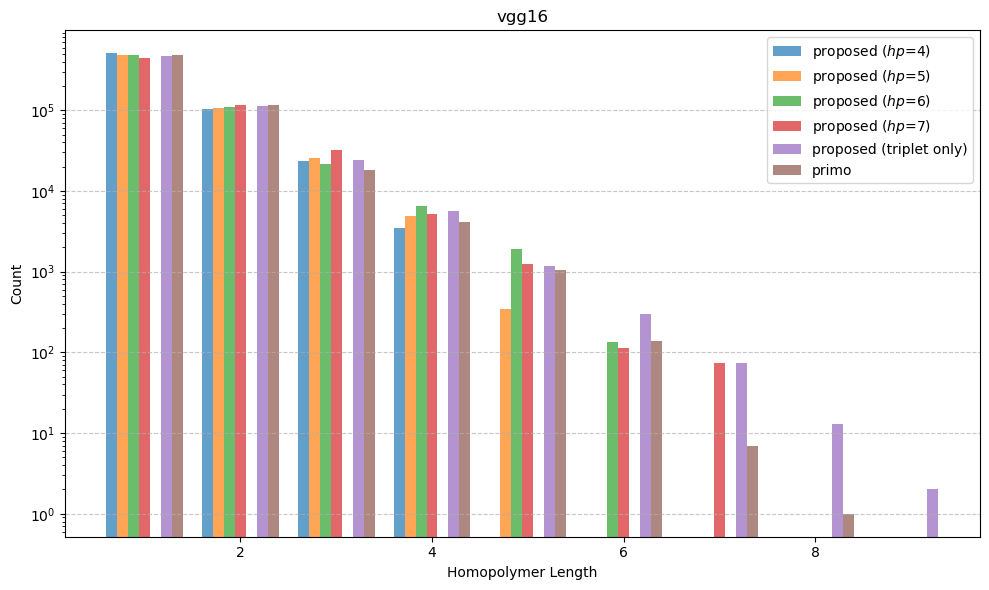

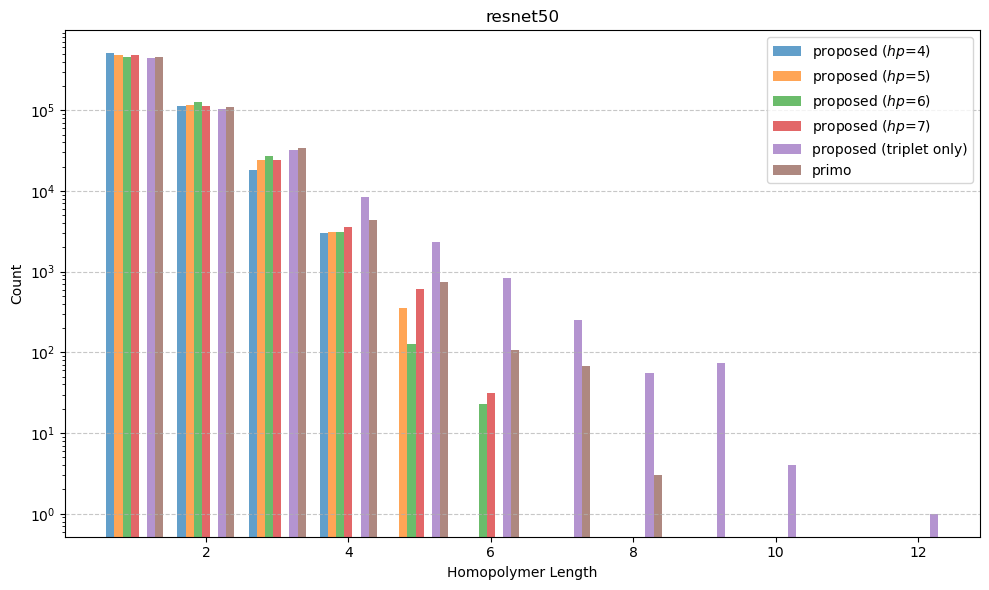

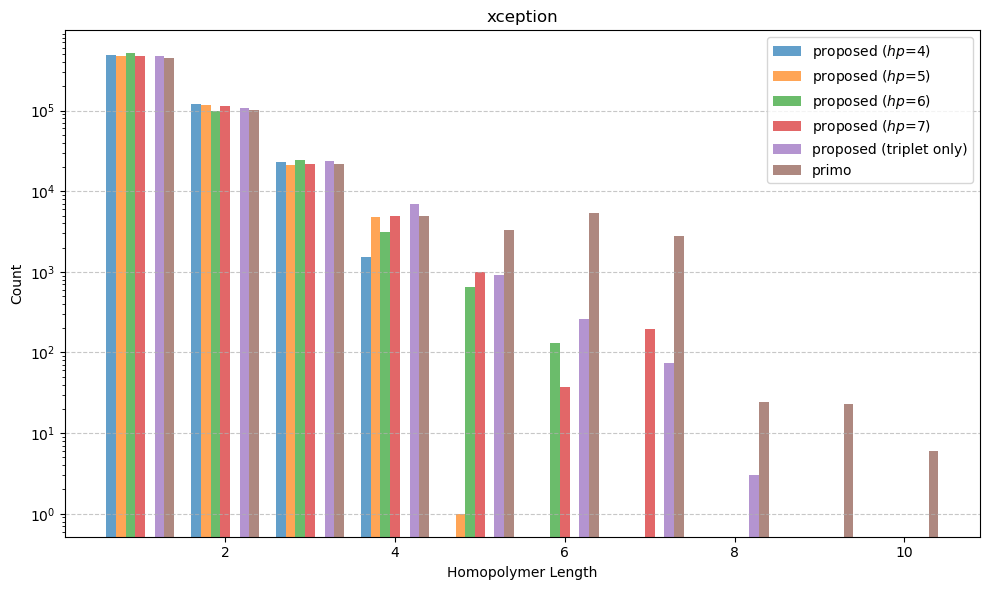

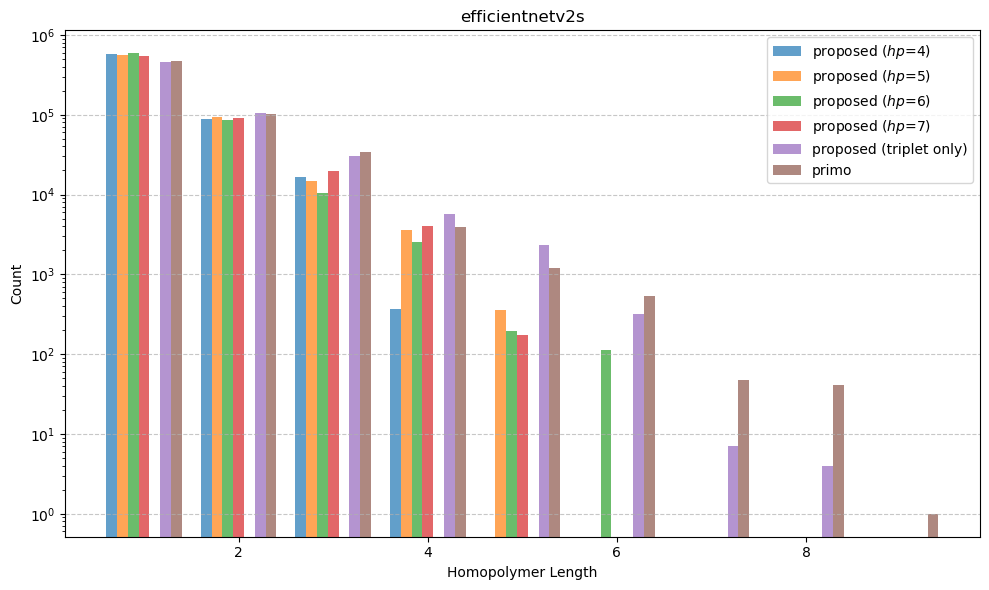

In [9]:
min_homopolymer_length = 1  # Minimum homopolymer length to detect
dataset = "cifar100"
data = f"{data_dir}/{dataset}/sequences/"
for dir in ["vgg16", "resnet50", "xception", "efficientnetv2s"]:
    fig, ax = plt.subplots(figsize=(10, 6))
    files = []
    for file in os.listdir(f"{data}/{dir}/"):
        if not (file.startswith("target") and file.endswith(".fasta")):
            continue
        files.append(file)
    num_files = len(files) + 2
    bar_width = 0.8 / num_files
    offsets = np.linspace(-0.4 + bar_width / 2, 0.4 - bar_width / 2, num_files)
    for idx, file in enumerate(sorted(files)):
        hp_match = re.search(r"hp(\d+)", file)
        hp = hp_match.group(0) if hp_match else ""
        if hp == "":
            continue
        fasta_file = f"{data}/{dir}/{file}"
        homopolymer_counts = count_homopolymer_from_fasta(min_homopolymer_length, fasta_file)
        df = pd.DataFrame(sorted(homopolymer_counts.items()), columns=["Length", "Count"])
        ax.bar(
            df["Length"] + offsets[idx],
            df["Count"],
            alpha=0.7,
            width=bar_width,
            label=fr"proposed ($hp$={hp.replace('hp', '')})"
        )
    triplet_only_file = f"{data}/{dir}/target_seqs_triplet_only.fasta"
    if os.path.exists(triplet_only_file):
        triplet_only_counts = count_homopolymer_from_fasta(min_homopolymer_length, triplet_only_file)
        triplet_only_df = pd.DataFrame(sorted(triplet_only_counts.items()), columns=["Length", "Count"])
        ax.bar(
            triplet_only_df["Length"] + offsets[-2],
            triplet_only_df["Count"],
            alpha=0.7,
            width=bar_width,
            label="proposed (triplet only)"
        )
    primo_file = f"{data_dir}/{dataset}/sequences/{dir}/primo_target_seqs.fasta"
    if os.path.exists(primo_file):
        primo_counts = count_homopolymer_from_fasta(min_homopolymer_length, primo_file)
        primo_df = pd.DataFrame(sorted(primo_counts.items()), columns=["Length", "Count"])
        ax.bar(
            primo_df["Length"] + offsets[-1],
            primo_df["Count"],
            alpha=0.7,
            width=bar_width,
            label="primo"
        )
    ax.set_title(f"{dir}")
    ax.set_xlabel("Homopolymer Length")
    ax.set_ylabel("Count")
    ax.set_yscale("log")
    ax.grid(axis="y", linestyle="--", alpha=0.7)
    ax.legend()
    fig.tight_layout()
    fig.savefig(f"{save_dir}/{dir}-{dataset}-hp-distribution.svg")


# GC Content distribution

In [18]:
from Bio import SeqIO
from Bio.SeqUtils import GC
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import os


## GC-content

In [19]:
def calculate_gc_content(fasta_file):
    """Calculate GC content for each sequence in a given FASTA file."""
    gc_contents = [GC(record.seq) for record in SeqIO.parse(fasta_file, "fasta")]
    return gc_contents

## CIFAR-10

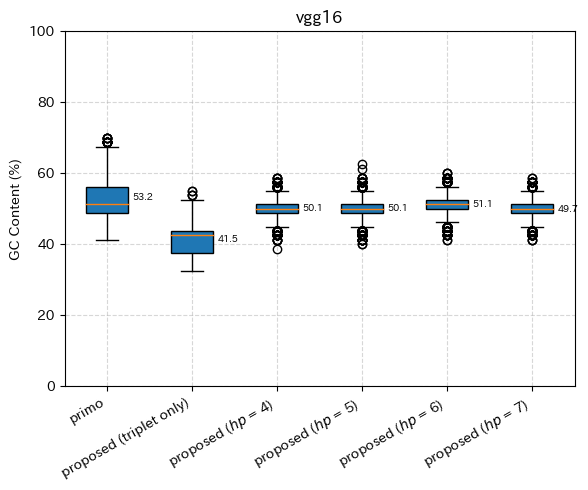

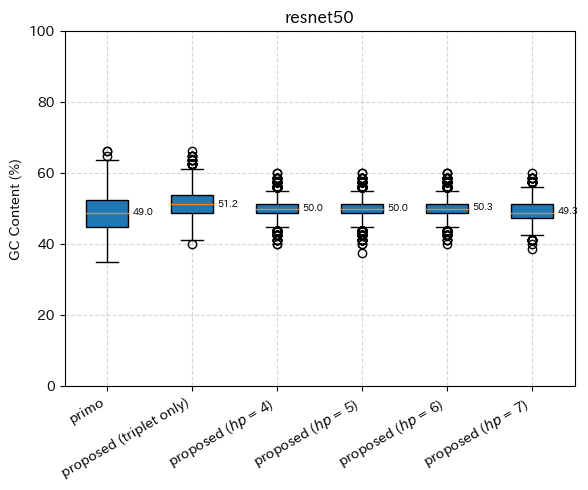

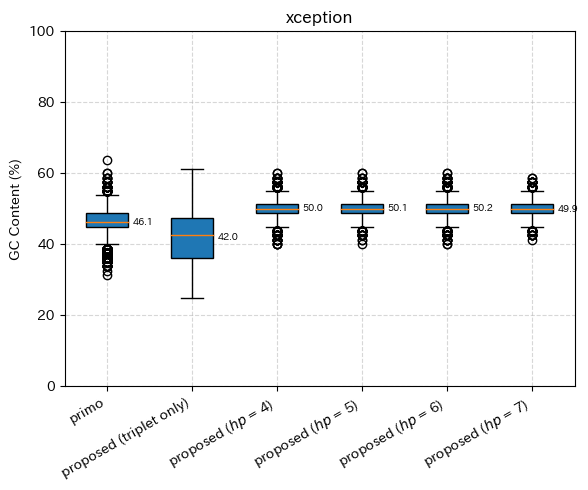

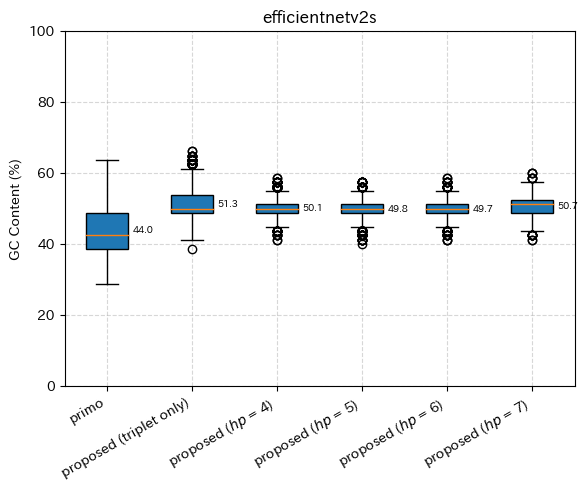

In [20]:
import re
import numpy as np

dirs = ["vgg16","resnet50", "xception", "efficientnetv2s"]
dataset = "cifar10"
for dir in dirs:
    files = []
    labels = []
    # Initialize lists to store GC content values for all directories
    all_primo_gc_values = []
    all_triplet_gc_values = []
    combined_gc_values = []
    for i in os.listdir(f"{data}/{dir}"):
        if not (i.startswith("target") and i.endswith(".fasta")):
            continue
        files.append(i)
    triplet_gc_values = calculate_gc_content(f"{data_dir}/{dataset}/sequences/{dir}/primo_target_seqs.fasta")
    combined_gc_values.append(triplet_gc_values)
    triplet_gc_values = calculate_gc_content(f"{data_dir}/{dataset}/sequences/{dir}/target_seqs_triplet_only.fasta")
    combined_gc_values.append(triplet_gc_values)
    for i in sorted(files):
        hp_match = re.search(r"hp(\d+)", i)
        hp = hp_match.group(0) if hp_match else ""
        if hp == "":
            continue
        triplet_fasta = f"{data}/{dir}/{i}"

        # Calculate GC content for each file
        triplet_gc_values = calculate_gc_content(triplet_fasta)

        # Append GC content values to the lists
        all_triplet_gc_values.append(triplet_gc_values)
        combined_gc_values.append(triplet_gc_values)
#         labels.append(i)
    labels = ["primo", "proposed (triplet only)"] + [fr"proposed ($hp$ = {i})" for i in range(4,8)]

    # Create boxplot for all directories
    plt.figure(figsize=(6, 5))

    # Create boxplot
    boxprops = dict(patch_artist=True)
    bp = plt.boxplot(combined_gc_values, patch_artist=True)
    means = np.average(combined_gc_values, axis=1)
    # 各箱（PathPatch）ごとに右側へオフセットして平均値を描画
    for i, (m, box) in enumerate(zip(means, bp['boxes']), start=1):
        # 箱のパスからバウンディングボックスを取得
        ext = box.get_path().get_extents()
        width = ext.width

        # 右へ 20% 分オフセット
        margin = width * 0.1
        x_offset = ext.x1 + margin

        # テキストを描画（左揃えにして、箱の外側へ）
        plt.text(
            x_offset,
            m,
            f"{m:.1f}",
            ha='left',
            va='center',
            fontsize=7,
            color='black'
        )

    # X 軸ラベル
    plt.xticks(range(1, len(labels) + 1), labels, rotation=30, ha="right")
    plt.title(f"{dir}")
    plt.ylabel("GC Content (%)")
    plt.ylim(0, 100)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.savefig(f"{save_dir}/{model}-{dataset}-gc-contents.svg")

## CIFAR-100

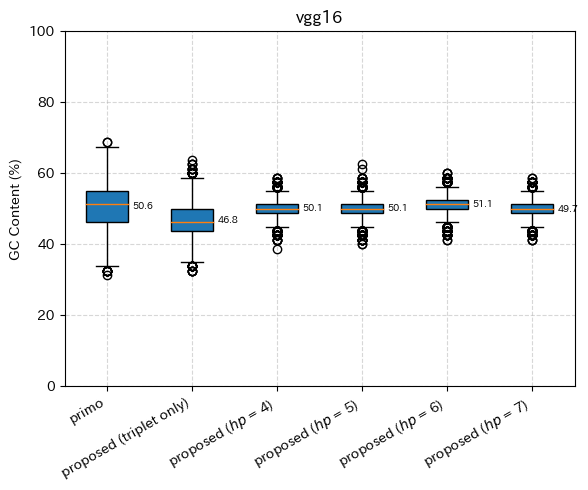

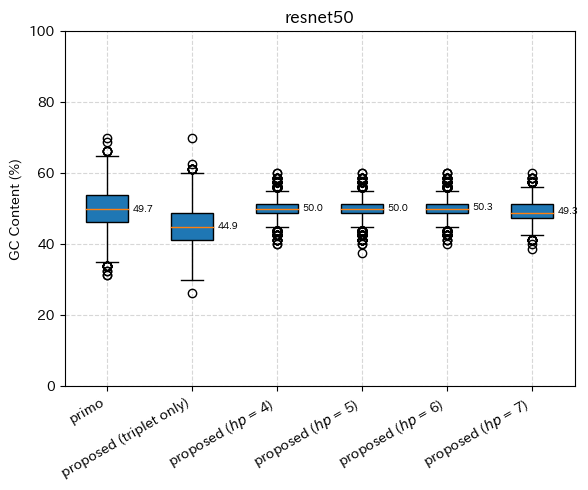

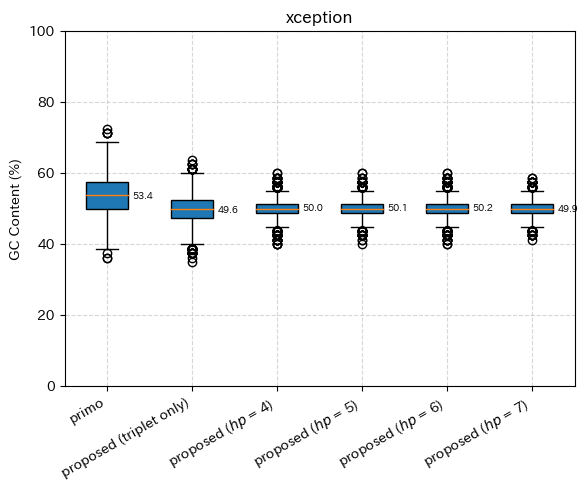

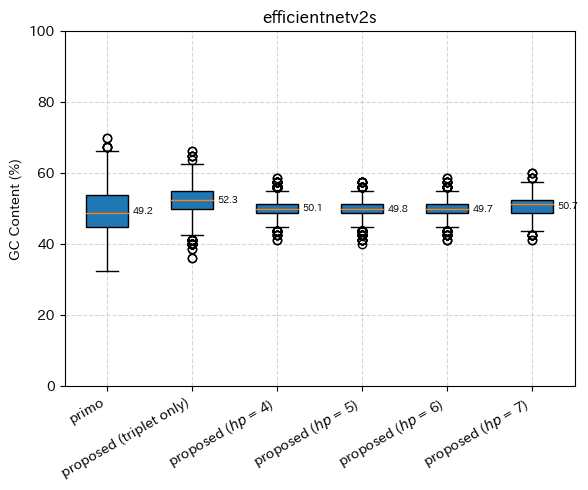

In [21]:
import re
import numpy as np

dirs = ["vgg16","resnet50", "xception", "efficientnetv2s"]
dataset = "cifar100"
for dir in dirs:
    files = []
    labels = []
    # Initialize lists to store GC content values for all directories
    all_primo_gc_values = []
    all_triplet_gc_values = []
    combined_gc_values = []
    for i in os.listdir(f"{data}/{dir}"):
        if not (i.startswith("target") and i.endswith(".fasta")):
            continue
        files.append(i)
    triplet_gc_values = calculate_gc_content(f"{data_dir}/{dataset}/sequences/{dir}/primo_target_seqs.fasta")
    combined_gc_values.append(triplet_gc_values)
    triplet_gc_values = calculate_gc_content(f"{data_dir}/{dataset}/sequences/{dir}/target_seqs_triplet_only.fasta")
    combined_gc_values.append(triplet_gc_values)
    for i in sorted(files):
        hp_match = re.search(r"hp(\d+)", i)
        hp = hp_match.group(0) if hp_match else ""
        if hp == "":
            continue
        triplet_fasta = f"{data}/{dir}/{i}"

        # Calculate GC content for each file
        triplet_gc_values = calculate_gc_content(triplet_fasta)

        # Append GC content values to the lists
        all_triplet_gc_values.append(triplet_gc_values)
        combined_gc_values.append(triplet_gc_values)
#         labels.append(i)
    labels = ["primo", "proposed (triplet only)"] + [fr"proposed ($hp$ = {i})" for i in range(4,8)]

    # Create boxplot for all directories
    plt.figure(figsize=(6, 5))

    # Create boxplot
    boxprops = dict(patch_artist=True)
    bp = plt.boxplot(combined_gc_values, patch_artist=True)
    means = np.average(combined_gc_values, axis=1)
    # 各箱（PathPatch）ごとに右側へオフセットして平均値を描画
    for i, (m, box) in enumerate(zip(means, bp['boxes']), start=1):
        # 箱のパスからバウンディングボックスを取得
        ext = box.get_path().get_extents()
        width = ext.width

        # 右へ 20% 分オフセット
        margin = width * 0.1
        x_offset = ext.x1 + margin

        # テキストを描画（左揃えにして、箱の外側へ）
        plt.text(
            x_offset,
            m,
            f"{m:.1f}",
            ha='left',
            va='center',
            fontsize=7,
            color='black'
        )

    # X 軸ラベル
    plt.xticks(range(1, len(labels) + 1), labels, rotation=30, ha="right")
    plt.title(f"{dir}")
    plt.ylabel("GC Content (%)")
    plt.ylim(0, 100)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.savefig(f"{save_dir}/{model}-{dataset}-gc-contents.svg")